# Perceptron
---
프랑크 로젠블라트(Frank Rosenblatt)가 1957년에 고안한 알고리즘

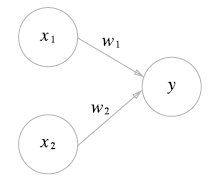


>다수의 신호를 입력으로 받아 하나의 신호를 출력
>- x1, x2는 입력 신호, y는 출력 신호, w1, w2는 가중치(weight)를 의미  
>- 원을 뉴런(neuron)이라고 칭함  
>- 입력 신호가 뉴런에 보내질 때 각각 고유한 가중치가 곱해짐  
>- 뉴런이 전달받은 신호의 총합이 임계값을 넘으면 출력을 생성  




## AND 게이트 동작 방식
---

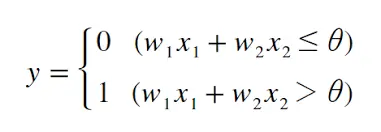


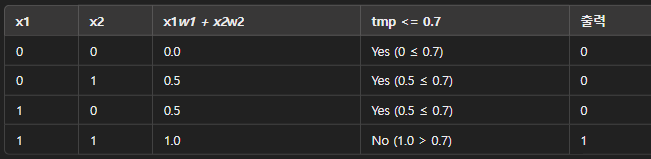

In [16]:
#퍼셉트론 모델을 사용하여 논리 AND 연산을 수행
def AND(x1, x2): # x1, x2 입력 받음
    w1, w2, theta = 0.5, 0.5, 0.7 # 가중치(w1, w2), 임계값(theta) 값 설정
    tmp = x1*w1 + x2*w2 
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

AND(0, 0) # 0
AND(1, 0) # 0
AND(0, 1) # 0
AND(1, 1) # 1

1

## 가중치와 편향을 도입
---

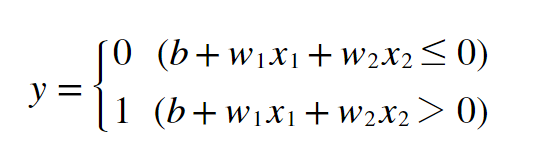

              (입력값 0, 1 기준으로 w, b 값이 지정)


>편향은 가중치와 다른 기능
> * 가중치는 w1과 w2는 각 입력 신호가 결과에 주는 영향력을 조절
> * 편향은 뉴련이 얼마나 쉽게 활성화(결과 1)하는지 조정하는 매개변수
>  * ex) b가 -0.1인 경우보다 -20.0일 때 활성화가 더 어려움

>AND,NAND,OR는 모두 같은 구조의 퍼셉트론
> * 가중치의 매개변수의 값만 차이가 존재

In [17]:
#AND 게이트
def AND(x1, x2):
    x = np.array([x1,x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [18]:
#NAND 게이트
def NAND(x1, x2):
    x = np.array([x1, x2])
    #AND와 가중치 w, b 차이만 존재
    w = np.array([-0.5,-0.5])
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp < 0:
        return 0
    else:
        return 1

In [ ]:
#OR 게이트
def OR(x1, x2):
    x = np.array([x1, x2])
    #AND와 가중치 w, b 차이만 존재
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

## 퍼셉트론 한계
---

XOR 게이트 구현하지 못함
>OR 예시
>  
>  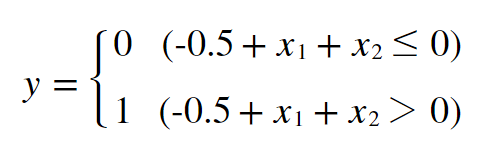
>
>  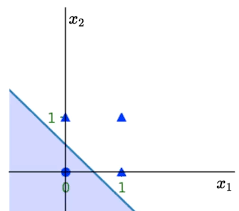
>
> * OR게이트는 위와 같이 직선으로 나뉜 두 영역을 만듦
> * 직선으로 나누닌 한 쪽은 1, 한 쪽은 0을 출력
>
>선형과 비선형
>
> 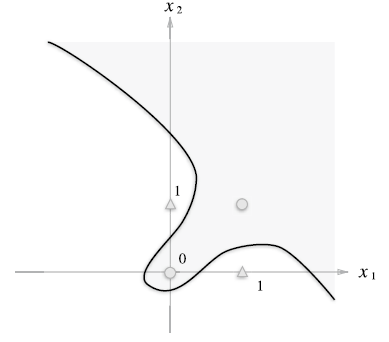
>
> * 위와 같이 직선 하나로 구분할 수 없음
> * XOR을 구현하기 위해서는 다충 퍼세트론으로 표현해야함

## multi-layer perceptron
---

다중 퍼셉트론이란

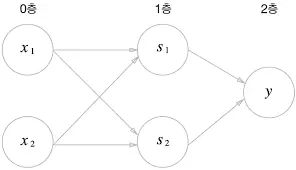
* 층처럼 나눠서 구성되어 있는 형태
>
>AND, NAND, OR 게이트를 조합해서 XOR 게이트 생성
>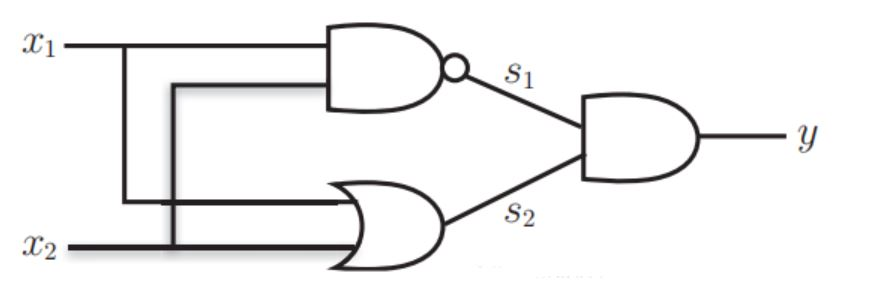
>
>* x1, x2는 NAD와 OR 게이트의 입력
>* NAND와 OR의 출력이 AND 게이트의 입력
>
>진리표
>
>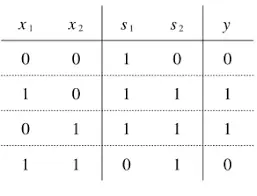

In [22]:
#XOR 게이트
import numpy as np

def AND(x1,x2):
    x = np.array([x1,x2])
    w = np.array([0.5,0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

def NAND(x1,x2):
    x = np.array([x1,x2])
    w = np.array([-0.5,-0.5])
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

def OR(x1,x2):
    x = np.array([x1,x2])
    w = np.array([0.5,0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

def XOR(x1,x2):
    s1 = NAND(x1,x2)
    s2 = OR(x1,x2)
    y = AND(s1,s2)
    return y

dx = [0,1,0,1]
dy = [0,0,1,1]

for i in range(4):
    nx = dx[i]
    ny = dy[i]
    print('NAND:',NAND(nx,ny))
    print('OR:',OR(nx,ny))
    print('XOR:',XOR(nx,ny))

NAND: 1
OR: 0
XOR: 0
NAND: 1
OR: 1
XOR: 1
NAND: 1
OR: 1
XOR: 1
NAND: 0
OR: 1
XOR: 0
